# Sentiment Analysis Project
This notebook loads data, performs EDA, trains models, and evaluates them.

In [1]:

import warnings
import pandas as pd
from utils import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
import joblib
warnings.filterwarnings("ignore")


## Load Data

In [2]:
columns = ['tweet_id', 'topic', 'sentiment', 'tweet_text'] 

data_path = 'twitter_training.csv'
df = pd.read_csv(data_path, header=None, names=columns)
df_test = pd.read_csv('twitter_validation.csv', header=None, names=columns)

df.head()

,tweet_id,topic,sentiment,tweet_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## EDA and Preprocessing Data

In [3]:
# Overview of the dataset
overview(df)
overview(df_test)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    74682 non-null  int64 
 1   topic       74682 non-null  object
 2   sentiment   74682 non-null  object
 3   tweet_text  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
--------------------------------------------------
           Metric  Value
0            Rows  74682
1         Columns      4
2  Missing Values    686
3  Duplicate Rows   2700
----------------------------------------------------------------------------------------------------
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1000 non-null   int64 
 1   topic       1000 non-null   object
 2   sentiment   10

In [4]:

df.dropna(inplace=True) # Drop rows with missing values
df.drop_duplicates(subset='tweet_id', keep='first', inplace=True) # Drop duplicates

#### Clean tweets

In [5]:
df['cleaned_text'] = df['tweet_text'].apply(clean_text) # Apply the clear_text function to the tweet_text column
df_test['cleaned_text'] = df_test['tweet_text'].apply(clean_text) # Apply the clear_text function to the tweet_text column

#### Explore Dataset

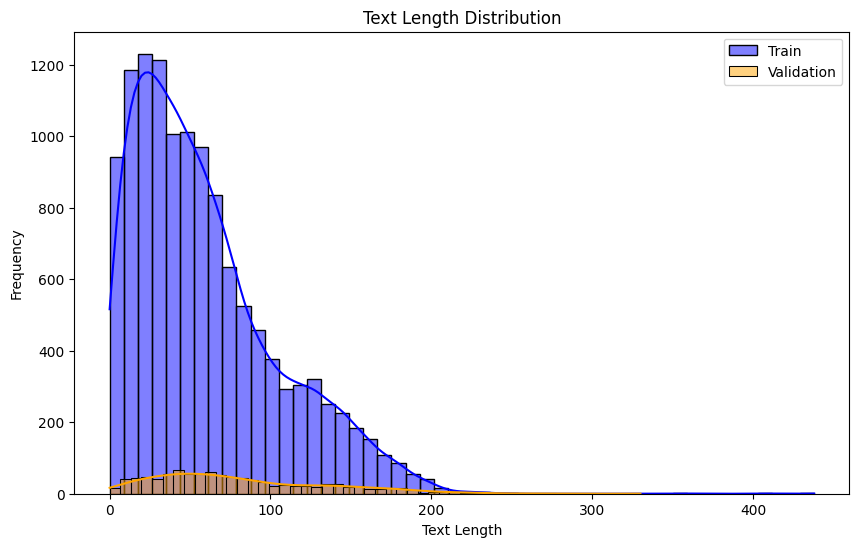

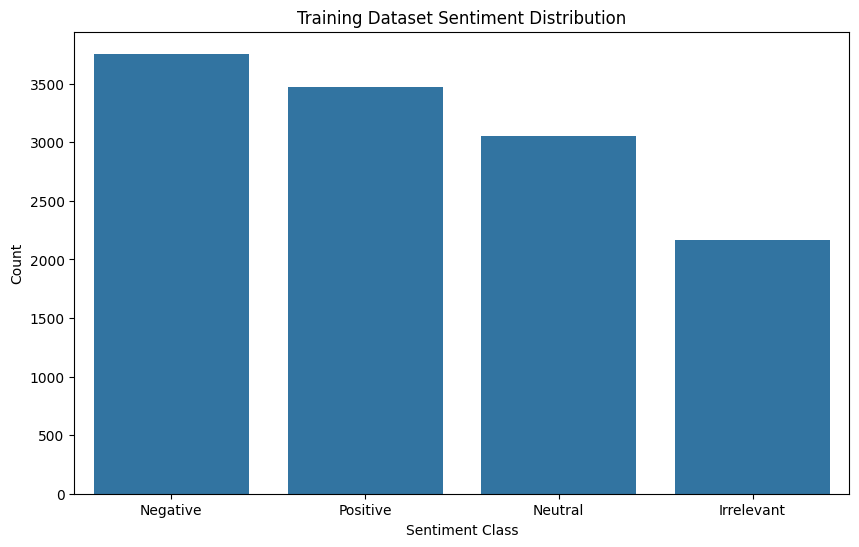

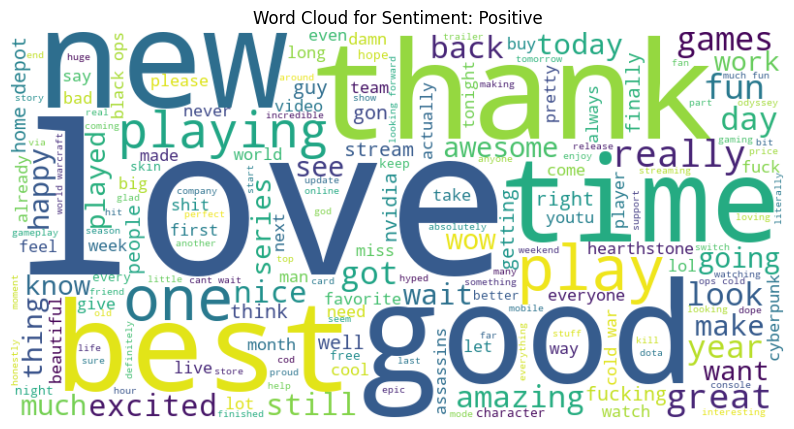

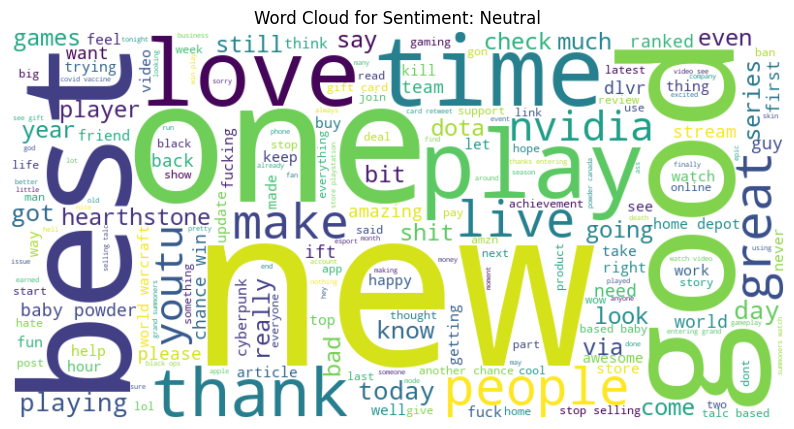

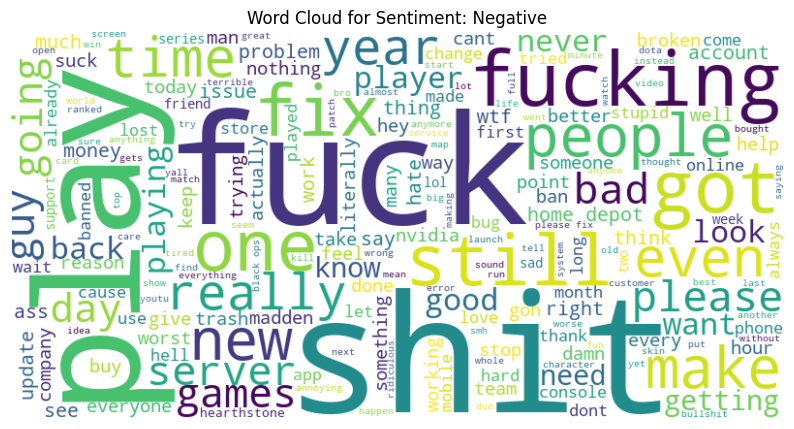

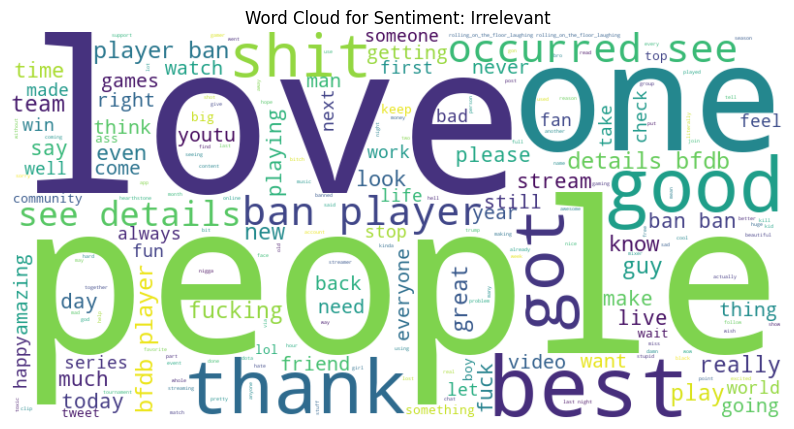

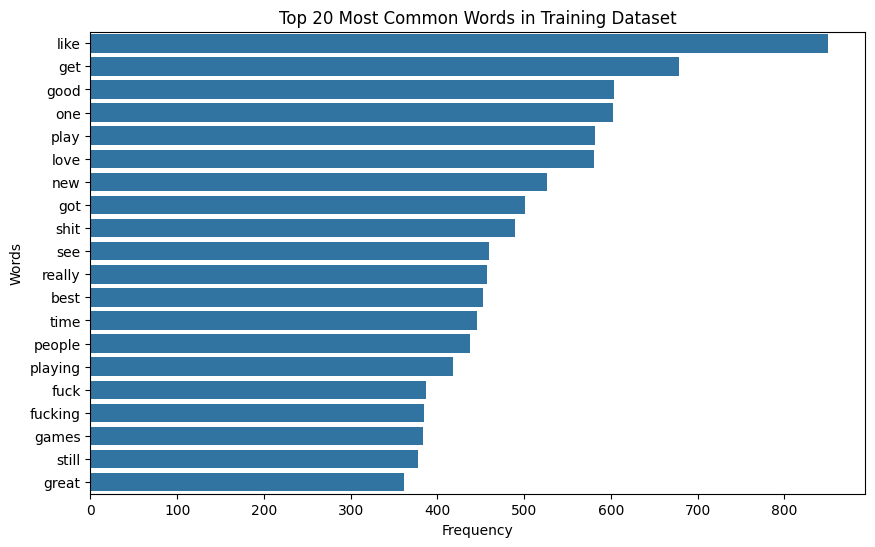

In [6]:

text_length_distribution(df,df_test)
classes_distribution(df)
word_cloud(df)
common_words(df)

#### Encode labels

In [7]:
df['sentiment'] = df['sentiment'].map({'Negative':0,'Positive':1, 'Neutral':2})  # Encode the sentiment column
df_test['sentiment'] = df_test['sentiment'].map({'Negative':0,'Positive':1, 'Neutral':2})  # Encode the sentiment column
df.dropna(inplace=True)  # Drop missing values
df_test.dropna(inplace=True)  # Drop missing values

#### Vectorize Data

In [8]:
count_vec = CountVectorizer()

X_train_count = vectorize_train_text(df['cleaned_text'], count_vec, 'count_vectorizer') 
X_test_count = vectorize_test_text(df_test['cleaned_text'], 'count_vectorizer') 

count_vec = joblib.load('count_vectorizer.pkl')

In [9]:
tfidf_vec = TfidfVectorizer()

X_train_tfidf = vectorize_train_text(df['cleaned_text'], tfidf_vec, 'tfidf_vectorizer') 
X_test_tfidf = vectorize_test_text(df_test['cleaned_text'], 'tfidf_vectorizer') 

tfidf_vec = joblib.load('tfidf_vectorizer.pkl')

In [10]:

y_train = df['sentiment']
y_test = df_test['sentiment']

## Train Models

In [11]:
# Train Random Forest
print("Training Random Forest using count vectorizer...")
rf_model_count, rf_params, rf_score = train_random_forest(X_train_count, y_train)
print(f"Best Random Forest Params: {rf_params}, Accuracy: {rf_score}")

# Train SVM
print("Training SVM using count vectorizer...")
svm_model_count, svm_params, svm_score = train_svm(X_train_count, y_train)
print(f"Best SVM Params: {svm_params}, Accuracy: {svm_score}")

# Train xgboost
print("Training XGBoost using count vectorizer...")
xgb_model_count, xgb_params, xgb_score = train_xgboost(X_train_count, y_train)
print(f"Best XGBoost Params: {xgb_params}, Accuracy: {xgb_score}")

# Train logistic regression
print("Training Logistic Regression using count vectorizer...")
lr_model_count, lr_params, lr_score = train_logistic_regression(X_train_count, y_train)
print(f"Best Logistic Regression Params: {lr_params}, Accuracy: {lr_score}")

# Train naive bayes
print("Training Naive Bayes using count vectorizer...")
nb_model_count = train_naive_bayes(X_train_count, y_train)

Training Random Forest using count vectorizer...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.0s
[CV] END .....................max_depth=10, n_estimators=150; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=150; total time=   1.4s
[CV] END .....................max_depth=10, n_estimators=150; total time=   1.5s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.0s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.0s

In [12]:
# Train Random Forest
print("Training Random Forest using Tfidf vectorizer...")
rf_model_tfidf, rf_params, rf_score = train_random_forest(X_train_tfidf, y_train)
print(f"Best Random Forest Params: {rf_params}, Accuracy: {rf_score}")

# Train SVM
print("Training SVM...")
svm_model_tfidf, svm_params, svm_score = train_svm(X_train_tfidf, y_train)
print(f"Best SVM Params: {svm_params}, Accuracy: {svm_score}")

# Train xgboost
print("Training XGBoost using Tfidf vectorizer...")
xgb_model_tfidf, xgb_params, xgb_score = train_xgboost(X_train_tfidf, y_train)
print(f"Best XGBoost Params: {xgb_params}, Accuracy: {xgb_score}")

# Train logistic regression
print("Training Logistic Regression using Tfidf vectorizer...")
lr_model_tfidf, lr_params, lr_score = train_logistic_regression(X_train_tfidf, y_train)
print(f"Best Logistic Regression Params: {lr_params}, Accuracy: {lr_score}")

# Train naive bayes
print("Training Naive Bayes using Tfidf vectorizer...")
nb_model_tfidf = train_naive_bayes(X_train_tfidf, y_train)

Training Random Forest using Tfidf vectorizer...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.0s
[CV] END .....................max_depth=10, n_estimators=150; total time=   1.5s
[CV] END .....................max_depth=10, n_estimators=150; total time=   1.5s
[CV] END .....................max_depth=10, n_estimators=150; total time=   1.6s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.1s
[CV] END ......................max_depth=20, n_estimators=50; total time=   1.0s

## Evaluate Models

In [13]:
# Dictionary to store model accuracies
models_accuracy_count = {}

# Evaluate models and store their accuracies
print('Random Forest using count vectorizer')
models_accuracy_count['Random Forest'] = evaluate_model(rf_model_count, X_test_count, y_test)
print('-' * 50)

print('SVM using count vectorizer')
models_accuracy_count['SVM'] = evaluate_model(svm_model_count, X_test_count, y_test)
print('-' * 50)

print('XGBoost using count vectorizer')
models_accuracy_count['XGBoost'] = evaluate_model(xgb_model_count, X_test_count, y_test)
print('-' * 50)

print('Logistic Regression using count vectorizer')
models_accuracy_count['Logistic Regression'] = evaluate_model(lr_model_count, X_test_count, y_test)
print('-' * 50)

print('Naive Bayes using count vectorizer')
models_accuracy_count['Naive Bayes'] = evaluate_model(nb_model_count, X_test_count, y_test)
print('-' * 50)



Random Forest using count vectorizer
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.96      0.76       266
         1.0       0.84      0.81      0.82       277
         2.0       0.98      0.52      0.68       285

    accuracy                           0.76       828
   macro avg       0.81      0.76      0.75       828
weighted avg       0.82      0.76      0.75       828

--------------------------------------------------
SVM using count vectorizer
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       266
         1.0       0.93      0.94      0.93       277
         2.0       0.95      0.86      0.90       285

    accuracy                           0.91       828
   macro avg       0.91      0.91      0.91       828
weighted avg       0.91      0.91      0.91       828

---------------------------------------------

In [14]:
# Dictionary to store model accuracies
models_accuracy_tfidf = {}

# Evaluate models and store their accuracies
print('Random Forest using Tfidf vectorizer')
models_accuracy_tfidf['Random Forest'] = evaluate_model(rf_model_tfidf, X_test_tfidf, y_test)
print('-' * 50)

print('SVM using Tfidf vectorizer')
models_accuracy_tfidf['SVM'] = evaluate_model(svm_model_tfidf, X_test_tfidf, y_test)
print('-' * 50)

print('XGBoost using Tfidf vectorizer')
models_accuracy_tfidf['XGBoost'] = evaluate_model(xgb_model_tfidf, X_test_tfidf, y_test)
print('-' * 50)

print('Logistic Regression using Tfidf vectorizer')
models_accuracy_tfidf['Logistic Regression'] = evaluate_model(lr_model_tfidf, X_test_tfidf, y_test)
print('-' * 50)

print('Naive Bayes using Tfidf vectorizer')
models_accuracy_tfidf['Naive Bayes'] = evaluate_model(nb_model_tfidf, X_test_tfidf, y_test)
print('-' * 50)



Random Forest using Tfidf vectorizer
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.96      0.74       266
         1.0       0.85      0.77      0.81       277
         2.0       0.95      0.51      0.67       285

    accuracy                           0.74       828
   macro avg       0.80      0.75      0.74       828
weighted avg       0.81      0.74      0.74       828

--------------------------------------------------
SVM using Tfidf vectorizer
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       266
         1.0       0.95      0.97      0.96       277
         2.0       0.97      0.93      0.95       285

    accuracy                           0.95       828
   macro avg       0.95      0.95      0.95       828
weighted avg       0.95      0.95      0.95       828

---------------------------------------------

In [15]:
# Print the model with the highest accuracy
print('Models using count vectorizer')
get_best_model(models_accuracy_count)

print('Models using Tfidf vectorizer')
get_best_model(models_accuracy_tfidf)  


Models using count vectorizer
The model with the highest accuracy is 'SVM' with an accuracy of 0.91.
Models using Tfidf vectorizer
The model with the highest accuracy is 'SVM' with an accuracy of 0.95.


'SVM'

## Predict Sentiment for a Sample Sentence

In [16]:
# Predict a single sentence using Count Vectorizer
test_sentence = 'this is a not good game'
rf_prediction_count = predict_sentiment(test_sentence, rf_model_count, count_vec)
svm_prediction_count = predict_sentiment(test_sentence, svm_model_count, count_vec)
xgb_prediction_count = predict_sentiment(test_sentence, xgb_model_count, count_vec)
nb_prediction_count = predict_sentiment(test_sentence, nb_model_count, count_vec)
lr_prediction_count = predict_sentiment(test_sentence, lr_model_count, count_vec)

print('Using Count Vectorizer')
print(f"RF Prediction: {rf_prediction_count}\nSVM Prediction: {svm_prediction_count}\nXGBoost Prediction: {xgb_prediction_count}\nNaive Bayes Prediction: {nb_prediction_count}\nLogistic Regression Prediction: {lr_prediction_count}")
print('-'*50)
# Predict a single sentence using TF-IDF Vectorizer
rf_prediction_tfidf = predict_sentiment(test_sentence, rf_model_tfidf, tfidf_vec)
svm_prediction_tfidf = predict_sentiment(test_sentence, svm_model_tfidf, tfidf_vec)
xgb_prediction_tfidf = predict_sentiment(test_sentence, xgb_model_tfidf, tfidf_vec)
nb_prediction_tfidf = predict_sentiment(test_sentence, nb_model_tfidf, tfidf_vec)
lr_prediction_tfidf = predict_sentiment(test_sentence, lr_model_tfidf, tfidf_vec)

print('Using TF-IDF Vectorizer')
print(f"RF Prediction: {rf_prediction_tfidf}\nSVM Prediction: {svm_prediction_tfidf}\nXGBoost Prediction: {xgb_prediction_tfidf}\nNaive Bayes Prediction: {nb_prediction_tfidf}\nLogistic Regression Prediction: {lr_prediction_tfidf}")


Using Count Vectorizer
RF Prediction: Positive
SVM Prediction: Positive
XGBoost Prediction: Positive
Naive Bayes Prediction: Positive
Logistic Regression Prediction: Positive
--------------------------------------------------
Using TF-IDF Vectorizer
RF Prediction: Positive
SVM Prediction: Positive
XGBoost Prediction: Positive
Naive Bayes Prediction: Positive
Logistic Regression Prediction: Positive


In [17]:
# Map feature names to coefficients
feature_to_coef_count = {word: coef for word, coef in zip(count_vec.get_feature_names_out(), rf_model_count.feature_importances_)}
feature_to_coef_tfidf = {word: coef for word, coef in zip(tfidf_vec.get_feature_names_out(), rf_model_tfidf.feature_importances_)}

In [18]:
print('Top 5 important features using count vectorizer')

for best_positive in sorted(feature_to_coef_count.items(),key=lambda x: x[1],reverse=True)[:5]:
    print (best_positive)

print('-'*50)

for best_negative in sorted(feature_to_coef_count.items(),key=lambda x: x[1])[:5]:
    print (best_negative)   

Top 5 important features using count vectorizer
('love', 0.02361382730105957)
('fix', 0.014590180585798014)
('fuck', 0.011601433791325897)
('shit', 0.011223171427883972)
('fun', 0.010541852137359205)
--------------------------------------------------
('aaa', 0.0)
('aahqxwcz', 0.0)
('aarogya', 0.0)
('aaron', 0.0)
('aat', 0.0)


In [19]:
print('Top 5 important features using tfidf vectorizer')

for best_positive in sorted(feature_to_coef_tfidf.items(),key=lambda x: x[1],reverse=True)[:5]:
    print (best_positive)

print('-'*50)

for best_negative in sorted(feature_to_coef_tfidf.items(),key=lambda x: x[1])[:5]:
    print (best_negative)   

Top 5 important features using tfidf vectorizer
('love', 0.02175743452452659)
('fix', 0.018349334875383018)
('fuck', 0.01520879986866331)
('good', 0.012991703585373942)
('wait', 0.012419673023436717)
--------------------------------------------------
('aaaaaaaaaaages', 0.0)
('aamaavpjyc', 0.0)
('aatmanirbhar', 0.0)
('abbxvg', 0.0)
('abducted', 0.0)


## Save Model

In [20]:
save_model(svm_model_tfidf, 'svm_model.pkl')

Model saved to svm_model.pkl
